In [3]:
import skimage,cv2,numpy as np
import matplotlib.pyplot as plt

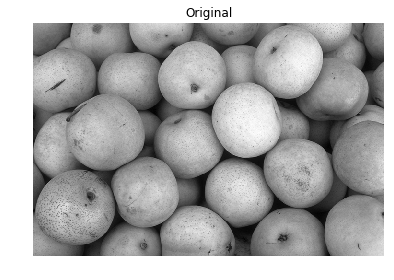

In [122]:
im=cv2.imread("pears (1).png",0)
gaussian=skimage.util.random_noise(im, mode='gaussian')
poison=skimage.util.random_noise(im, mode='poisson')            # using skimage functions to generate noise in image
salt=skimage.util.random_noise(im, mode='salt')
pepper=skimage.util.random_noise(im, mode='pepper')
s_p=skimage.util.random_noise(im, mode='s&p')
speckle=skimage.util.random_noise(im, mode='speckle')


#function defined to subplot results and type of operations. 
def plot(im0,im1,im2,im3,im4,im5,im6,ms0="",ms1="",ms2="",ms3="",ms4="",ms5="",ms6=""):

    plt.figure(figsize=(30, 30))
    plt.subplot(631)
    plt.imshow(im0, cmap='gray')
    plt.axis('off')
    plt.title(ms0) 
    
    plt.figure(figsize=(30, 30))
    plt.subplot(631)
    plt.imshow(im1, cmap='gray')
    plt.axis('off')
    plt.title(ms1) 

    plt.subplot(632)
    plt.imshow(im2, cmap='gray')
    plt.axis('off')
    plt.title(ms2)

    plt.subplot(633)
    plt.imshow(im3, cmap='gray')
    plt.axis('off')
    plt.title(ms3)
    plt.figure(figsize=(30, 30))
    plt.subplot(631)
    plt.imshow(im4, cmap='gray')
    plt.axis('off')
    plt.title(ms4) 

    plt.subplot(632)
    plt.imshow(im5, cmap='gray')
    plt.axis('off')
    plt.title(ms5)

    plt.subplot(633)
    plt.imshow(im6, cmap='gray')
    plt.axis('off')
    plt.title(ms6)



    plt.show()
    
plot(im,gaussian,poison,s_p,pepper,speckle,salt,"Original","Gaussian","Poison","Salt and peppper", "Pepper","Speckle","Salt")

In [139]:
from scipy import ndimage,misc

def geometric(im):
    
    shape=im.shape
     
    im=im.astype(float)
    im1=im.copy().astype('uint8')         ##Applying formula of geometric mean filter and adding 0.0000001 for
    for i in range(1,shape[0]-1):          # mitigating zero effect in product
        for j in range(1,shape[1]-1):
            temp=(im[i-1:i+2,j-1:j+2])
            prod=1   
            for a in temp.flatten():
                prod*=(a+(0.000000000001))
             
            prod= np.power(prod,float(1)/9) 
            
            im1[i,j]=prod*255 
           
           
    
    
    return im1.astype("uint8")

def contra_harmonic(im,R):
    shape=im.shape
    im=im.astype(float)
    im1=im.copy().astype("uint8")
    for i in range(1,shape[0]-1):              #Application of formula of contra_harmonic
        for j in range(1,shape[1]-1):
            filter=im[i-1:i+2,j-1:j+2] 
            num=np.sum(np.power(filter,R+1))
            denum=np.sum(np.power(filter,R))
            im1[i,j]=(float(num)/denum)*255
    return im1

def harmonic(im):
    shape=im.shape
    im1=im.copy().astype("uint8")
    for i in range(1,shape[0]):
        for j in range(1,shape[1]):      # application of formula
            filter=im[i-1:i+2,j-1:j+2]
            im1[i,j]=(3/np.sum((float(1)+0.0000001)/(filter+0.00000001)))*255
    return im1

def max_filter(im):
    return ndimage.maximum_filter(im,size=(3,3))
                                                    # using builtin functions
def median_filter(im):
    return ndimage.median_filter(im,size=(3,3))

def min_filter(im):
    return ndimage.minimum_filter(im,size=(3,3))

def avg_filter(im):
    kernel=np.ones((3,3))/9
    return cv2.filter2D(im,-1,kernel)

 

 


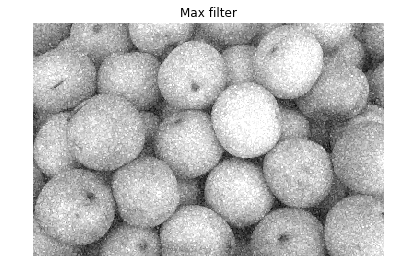

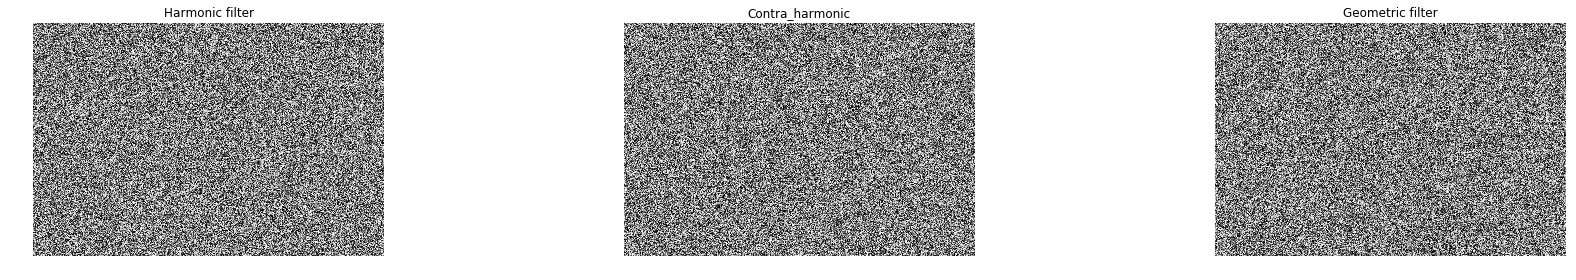

In [125]:
#Effect on Gaussian
max=max_filter(gaussian)
min=min_filter(gaussian)
median=median_filter(gaussian)
avg=avg_filter(gaussian)
harmonic=harmonic(im)
contra=contra_harmonic(im,2)
geometric=geometric(im)

plot(max,min,median,avg,harmonic,contra,geometric,"Max filter","Min filter", "Median filter","Average filter","Harmonic filter","Contra_harmonic","Geometric filter")



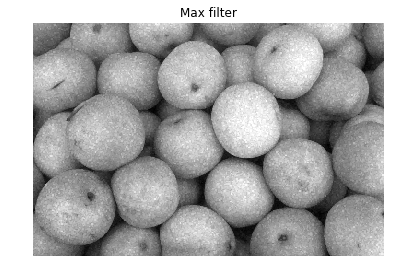

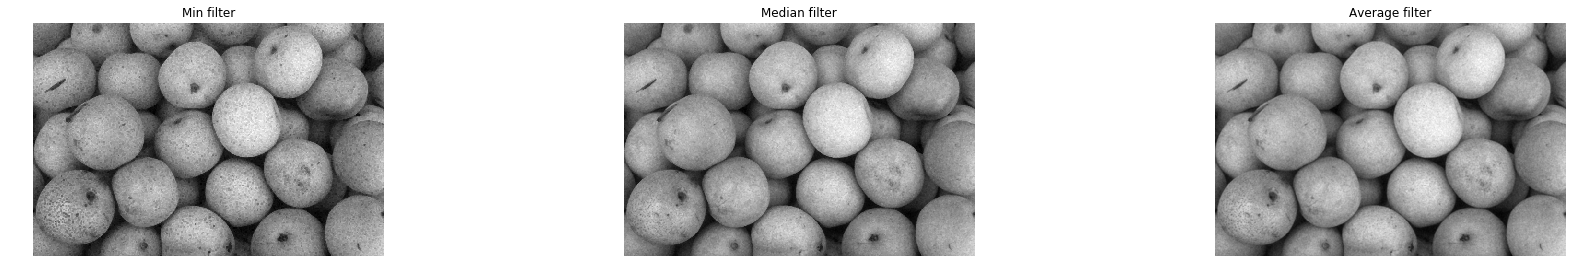

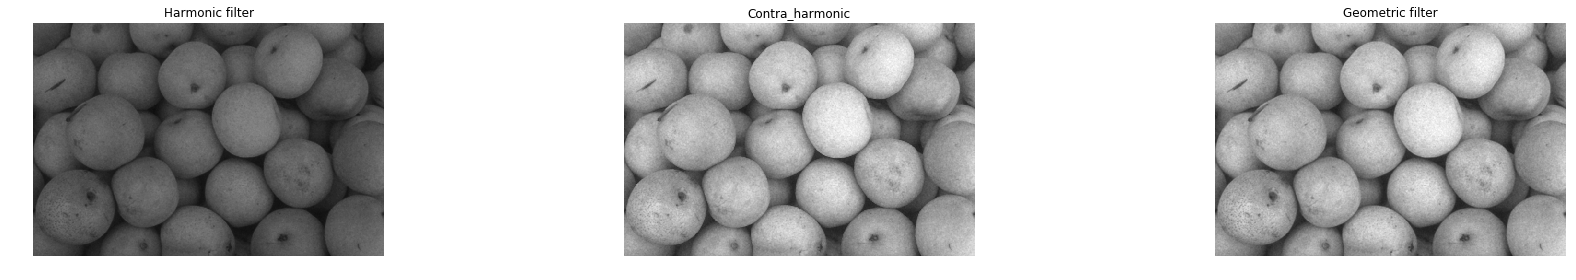

In [128]:
#Effect on Poisson
max=max_filter(poison)
min=min_filter(poison)
median=median_filter(poison)
avg=avg_filter(poison)
harmonic=harmonic(poison)
contra=contra_harmonic(poison,2)
geometric=geometric(poison)

plot(max,min,median,avg,harmonic,contra,geometric,"Max filter","Min filter", "Median filter","Average filter","Harmonic filter","Contra_harmonic","Geometric filter")




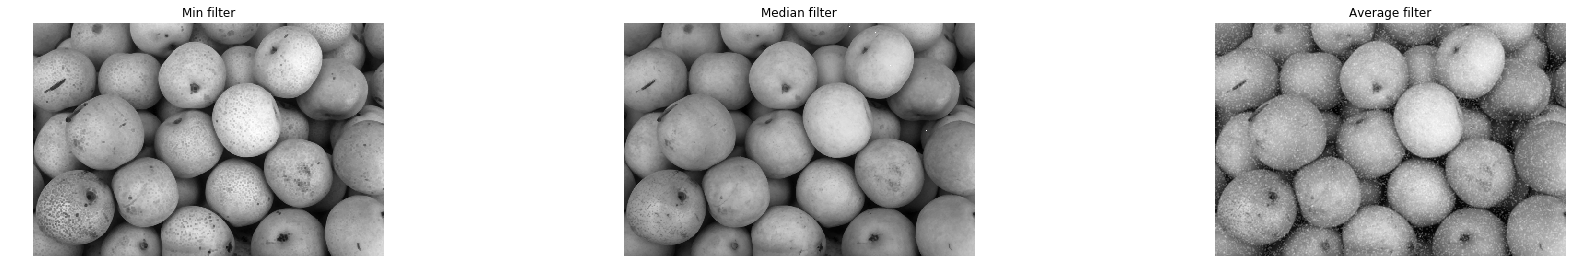

In [134]:
#Effect on Salt
max=max_filter(salt)
min=min_filter(salt)
median=median_filter(salt)
avg=avg_filter(salt)
harmonic=harmonic(salt)
contra=contra_harmonic(salt,-2)
geometric=geometric(salt)

plot(max,min,median,avg,harmonic,contra,geometric,"Max filter","Min filter", "Median filter","Average filter","Harmonic filter","Contra_harmonic","Geometric filter")




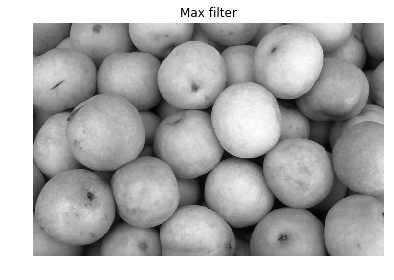

In [136]:
#Effect on Pepper
max=max_filter(pepper)
min=min_filter(pepper)
median=median_filter(pepper)
avg=avg_filter(pepper)
harmonic=harmonic(pepper)
contra=contra_harmonic(pepper,2)
geometric=geometric(pepper)

plot(max,min,median,avg,harmonic,contra,geometric,"Max filter","Min filter", "Median filter","Average filter","Harmonic filter","Contra_harmonic","Geometric filter")




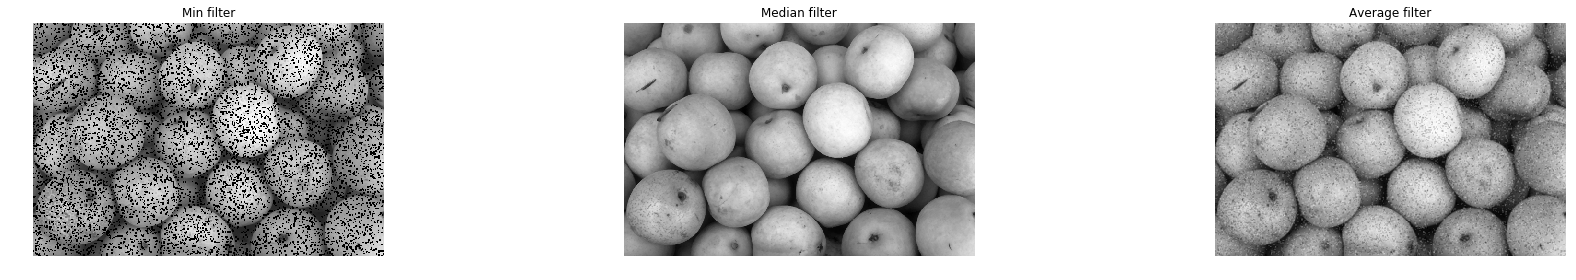

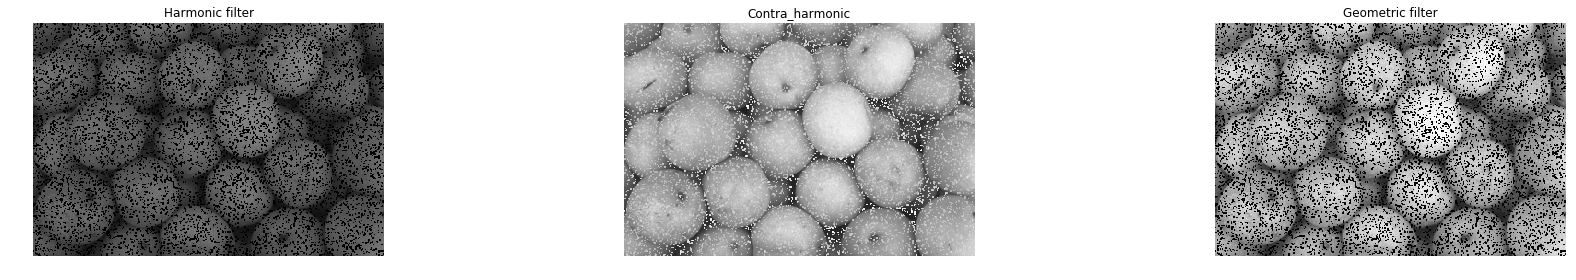

In [140]:
#Effect on Salt and Pepper
max=max_filter(s_p)
min=min_filter(s_p)
median=median_filter(s_p)
avg=avg_filter(s_p)
harmonic=harmonic(s_p)
contra=contra_harmonic(s_p,2)
geometric=geometric(s_p)

plot(max,min,median,avg,harmonic,contra,geometric,"Max filter","Min filter", "Median filter","Average filter","Harmonic filter","Contra_harmonic","Geometric filter")




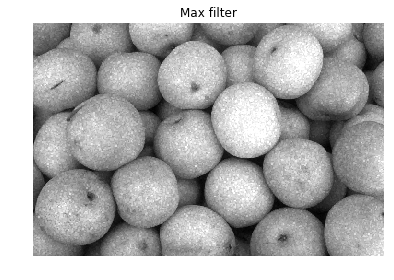

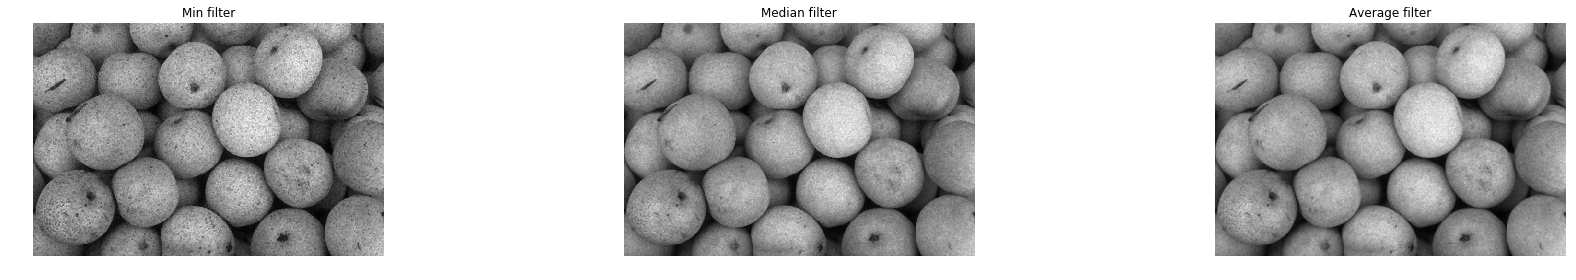

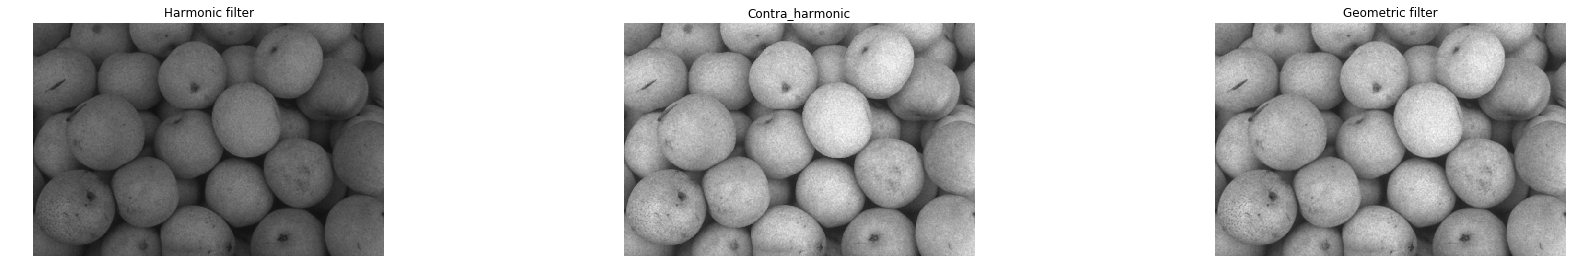

In [138]:
#Effect on Speckle
max=max_filter(speckle)
min=min_filter(speckle)
median=median_filter(speckle)
avg=avg_filter(speckle)
harmonic=harmonic(speckle)
contra=contra_harmonic(speckle,2)
geometric=geometric(speckle)

plot(max,min,median,avg,harmonic,contra,geometric,"Max filter","Min filter", "Median filter","Average filter","Harmonic filter","Contra_harmonic","Geometric filter")




In [141]:
"""
Answer 1: 
    since contra harmonic is used to remove salt OR pepper hence sign of order R matters. 
if its applied is a wrong way then amount of noise will be increased rather than decrease.


Answer 2: 
Median filter works on Salt and pepper because salt 255 and pepper 0 are extreme value and median replaces them 
with the middle values which will be actual values of pixels
Where as in case of gaussian noise the noise is generated in middle region hence after application of 
median filter we get same noise in mid and we choose it after filtering
"""

'\nAnswer 1: \n    since contra harmonic is used to remove salt OR pepper hence sign of order R matters. \n\n\n\n\nAnswer 2: \nMedian filter works on Salt and pepper because salt 255 and pepper 0 are extreme value and median replaces them \nwith the middle values which will be actual values of pixels\nWhere as in case of gaussian noise the noise is generated in middle region hence after application of \nmedian filter we get same noise in mid and we choose it after filtering\n'